In [49]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# DATASET

wine.csv <br>
Source: https://online.stat.psu.edu/stat508/lesson/analysis-wine-quality-data

winequalityN.csv <br>
Source: https://www.kaggle.com/swetash/beginners-friendly-comparison-of-classifiers/data

In [50]:
df1 = pd.read_csv('datasets/wine_data.csv')
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
df2 = pd.read_csv('datasets/winequalityN.csv')
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
df2 = df2.drop(['type'], axis=1)
df = pd.concat([df1,df2])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# DATA EXPLORATION

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         8086 non-null   float64
 1   volatile acidity      8088 non-null   float64
 2   citric acid           8093 non-null   float64
 3   residual sugar        8094 non-null   float64
 4   chlorides             8094 non-null   float64
 5   free sulfur dioxide   8096 non-null   float64
 6   total sulfur dioxide  8096 non-null   float64
 7   density               8096 non-null   float64
 8   pH                    8087 non-null   float64
 9   sulphates             8092 non-null   float64
 10  alcohol               8096 non-null   float64
 11  quality               8096 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 822.2 KB


In [54]:
df.shape

(8096, 12)

In [55]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8086.000000,8088.000000,8093.000000,8094.000000,8094.000000,8096.000000,8096.000000,8096.000000,8087.000000,8092.000000,8096.000000,8096.000000
mean,7.434708,0.376884,0.309288,4.870330,0.062250,27.631793,102.062068,0.995102,3.236728,0.556298,10.478209,5.782362
std,1.463285,0.183573,0.157440,4.460673,0.039736,17.562274,59.481471,0.002930,0.163721,0.161242,1.168973,0.863688
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.240000,0.230000,1.800000,0.040000,14.000000,47.000000,0.992900,3.120000,0.450000,9.500000,5.000000
50%,7.100000,0.320000,0.300000,2.500000,0.052000,25.000000,104.000000,0.995460,3.230000,0.530000,10.300000,6.000000
75%,8.000000,0.490000,0.400000,7.000000,0.077000,38.000000,146.000000,0.997200,3.340000,0.630000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [56]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6321,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4
6428,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6
6429,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5
6486,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


# PRE PROCESSING 

## Removing Duplicates

In [57]:
print('Duplicated Rows:', len(df)-len(df.drop_duplicates()))
df = df.drop_duplicates(keep='first')
df.shape

Duplicated Rows: 2763


(5333, 12)

## Dealing with NANs

In [58]:
df.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Text(0.5, 0, 'quality')

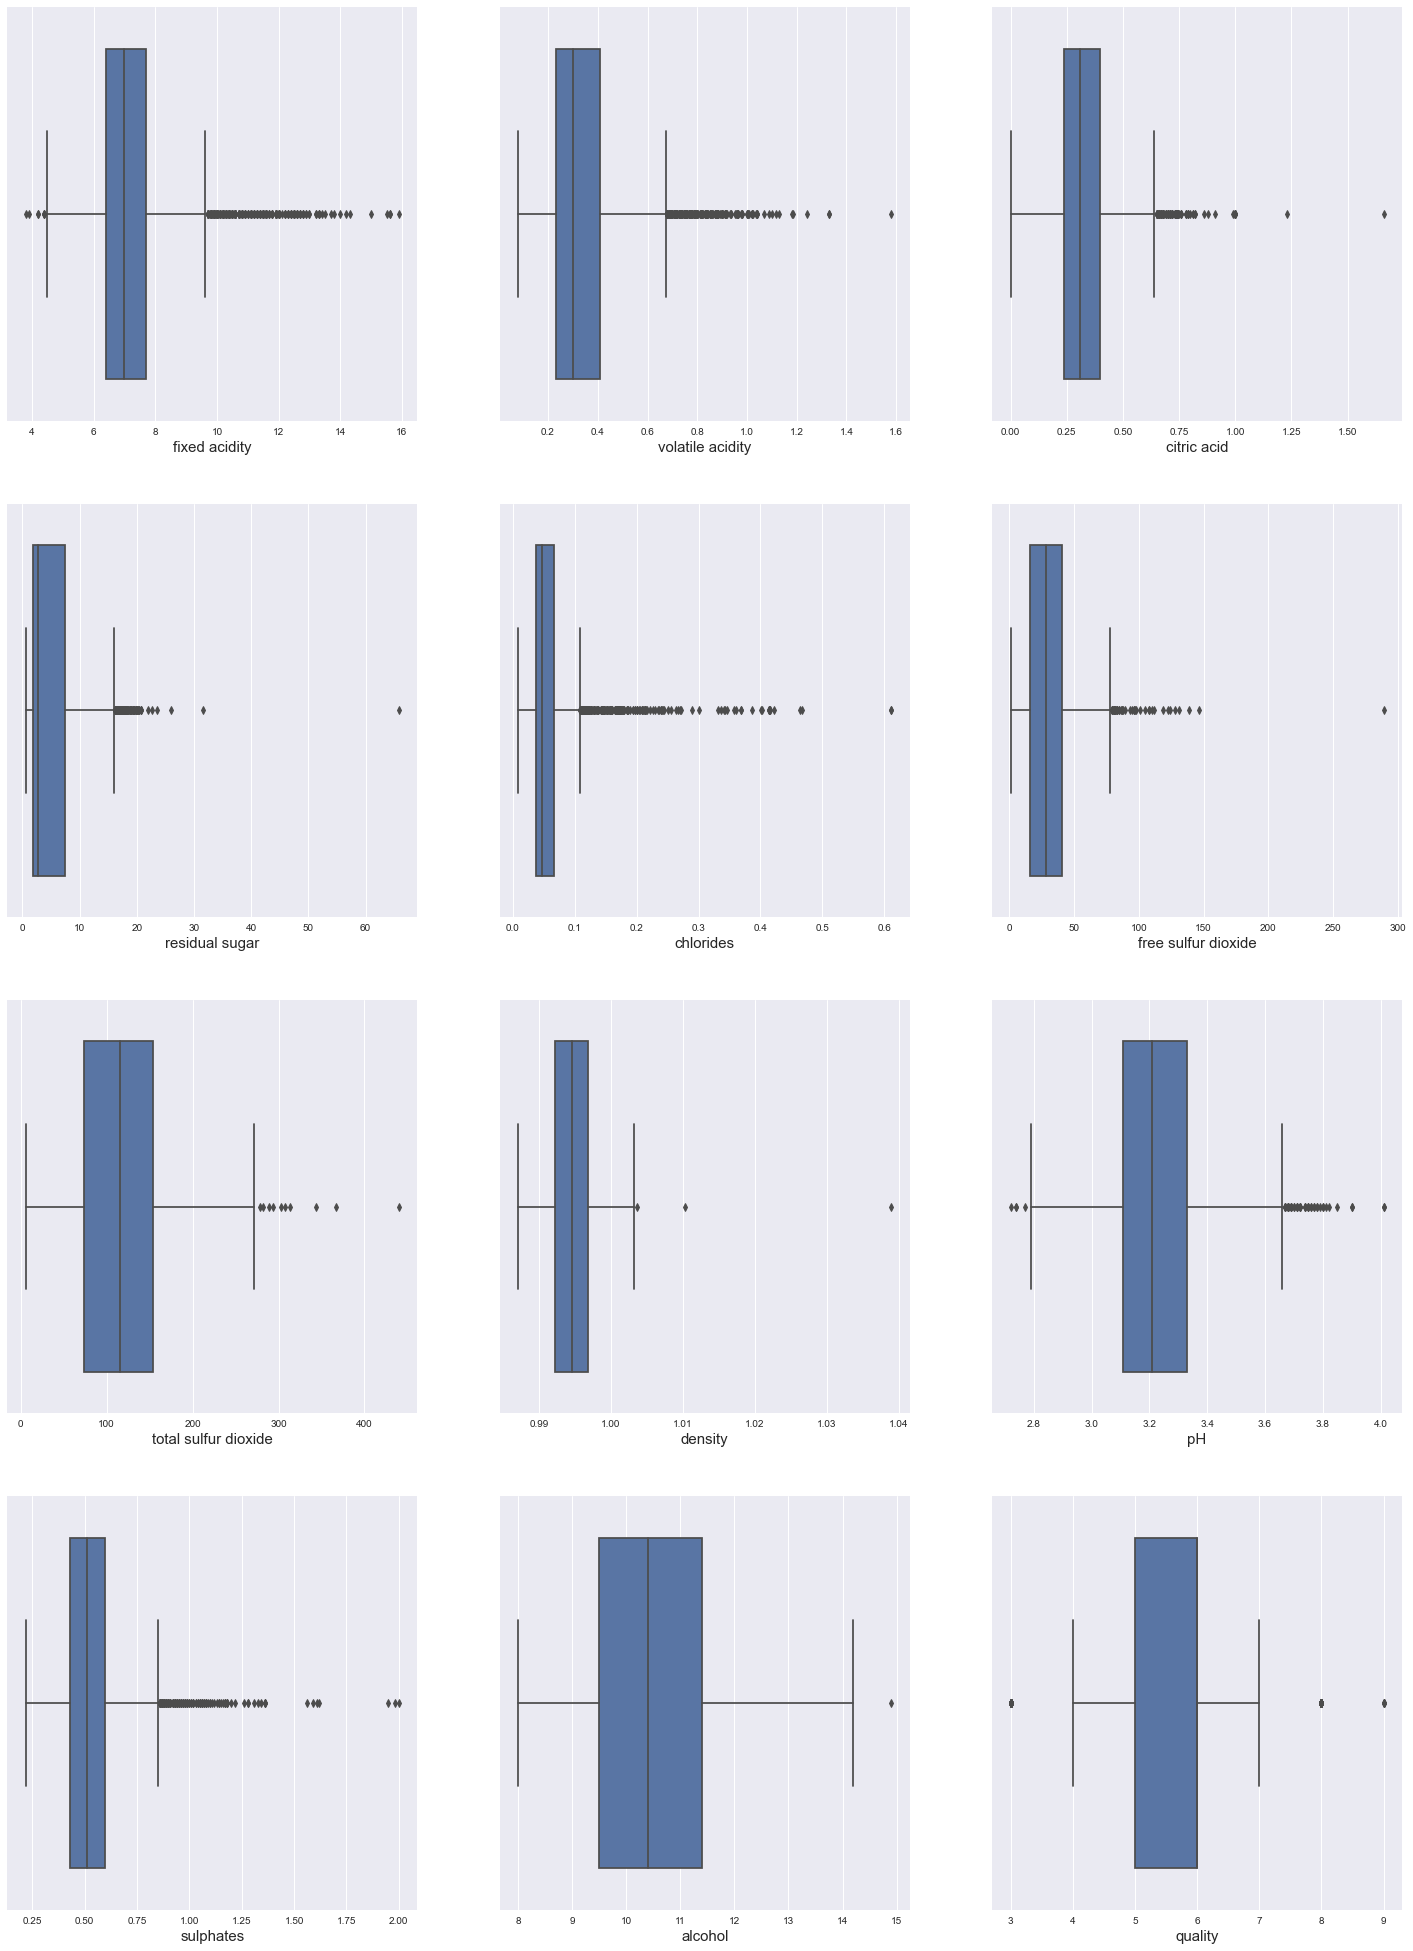

In [59]:
fig, ax =plt.subplots(4,3, figsize=(25,35)) 

sns.boxplot(x=df['fixed acidity'], ax=ax[0,0])
ax[0,0].set_xlabel('fixed acidity', fontsize=15)

sns.boxplot(x=df['volatile acidity'], ax=ax[0,1])
ax[0,1].set_xlabel('volatile acidity', fontsize=15)

sns.boxplot(x=df['citric acid'], ax=ax[0,2])
ax[0,2].set_xlabel('citric acid', fontsize=15)

sns.boxplot(x=df['residual sugar'], ax=ax[1,0])
ax[1,0].set_xlabel('residual sugar', fontsize=15)

sns.boxplot(x=df['chlorides'], ax=ax[1,1])
ax[1,1].set_xlabel('chlorides', fontsize=15)

sns.boxplot(x=df['free sulfur dioxide'], ax=ax[1,2])
ax[1,2].set_xlabel('free sulfur dioxide', fontsize=15)

sns.boxplot(x=df['total sulfur dioxide'], ax=ax[2,0])
ax[2,0].set_xlabel('total sulfur dioxide', fontsize=15)

sns.boxplot(x=df['density'], ax=ax[2,1])
ax[2,1].set_xlabel('density', fontsize=15)

sns.boxplot(x=df['pH'], ax=ax[2,2])
ax[2,2].set_xlabel('pH', fontsize=15)

sns.boxplot(x=df['sulphates'], ax=ax[3,0])
ax[3,0].set_xlabel('sulphates', fontsize=15)

sns.boxplot(x=df['alcohol'], ax=ax[3,1])
ax[3,1].set_xlabel('alcohol', fontsize=15)

sns.boxplot(x=df['quality'], ax=ax[3,2])
ax[3,2].set_xlabel('quality', fontsize=15)

## Inserting median as there are outliers

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['fixed acidity']] = imputer.fit_transform(df[['fixed acidity']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['volatile acidity']] = imputer.fit_transform(df[['volatile acidity']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['citric acid']] = imputer.fit_transform(df[['citric acid']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['citric acid']] = imputer.fit_transform(df[['citric acid']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['residual sugar']] = imputer.fit_transform(df[['residual sugar']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['chlorides']] = imputer.fit_transform(df[['chlorides']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['pH']] = imputer.fit_transform(df[['pH']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['sulphates']] = imputer.fit_transform(df[['sulphates']])

In [61]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
df = df.reset_index()

# DATA EXPLORATION

In [63]:
df.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000,5333.00000,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000
mean,2002.665854,7.215742,0.344353,0.318536,5.051341,0.056701,30.047909,114.11307,0.994538,3.224639,0.533520,10.549384,5.795612
std,1445.612970,1.317641,0.168230,0.147204,4.502110,0.036833,17.811042,56.81062,0.002964,0.160292,0.149761,1.186059,0.879799
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,776.000000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.00000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,1571.000000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.00000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,3210.000000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.00000,0.996770,3.330000,0.600000,11.400000,6.000000
max,6493.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,9.000000


In [64]:
df.corr()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
index,1.000000,-0.390233,-0.305762,-0.017161,0.146090,-0.280155,0.218096,0.233629,-0.382946,-0.207605,-0.241306,0.232397,0.090732
fixed acidity,-0.390233,1.000000,0.213917,0.329226,-0.104488,0.288350,-0.281050,-0.326143,0.477427,-0.270784,0.304569,-0.103027,-0.080250
volatile acidity,-0.305762,0.213917,1.000000,-0.384202,-0.164875,0.367637,-0.349053,-0.402250,0.307124,0.247450,0.227327,-0.063928,-0.264566
citric acid,-0.017161,0.329226,-0.384202,1.000000,0.147073,0.053784,0.132746,0.196794,0.094063,-0.344629,0.058110,-0.006271,0.099188
residual sugar,0.146090,-0.104488,-0.164875,0.147073,1.000000,-0.123686,0.399272,0.487693,0.521313,-0.234302,-0.175663,-0.306509,-0.057315
chlorides,-0.280155,0.288350,0.367637,0.053784,-0.123686,1.000000,-0.186976,-0.270641,0.371429,0.027467,0.404544,-0.268485,-0.202619
free sulfur dioxide,0.218096,-0.281050,-0.349053,0.132746,0.399272,-0.186976,1.000000,0.720534,0.006695,-0.142020,-0.198056,-0.170086,0.055117
total sulfur dioxide,0.233629,-0.326143,-0.402250,0.196794,0.487693,-0.270641,0.720534,1.000000,0.006842,-0.224164,-0.275730,-0.249744,-0.049563
density,-0.382946,0.477427,0.307124,0.094063,0.521313,0.371429,0.006695,0.006842,1.000000,0.034824,0.282067,-0.667839,-0.327028
pH,-0.207605,-0.270784,0.247450,-0.344629,-0.234302,0.027467,-0.142020,-0.224164,0.034824,1.000000,0.167998,0.097837,0.039054


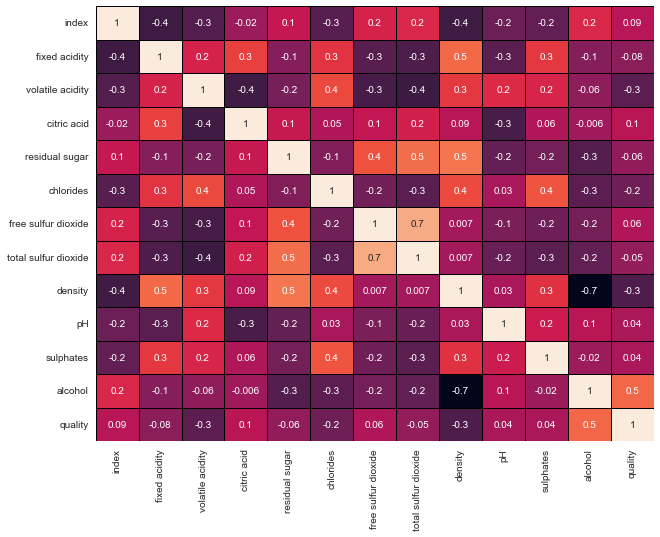

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.9, linecolor='black');

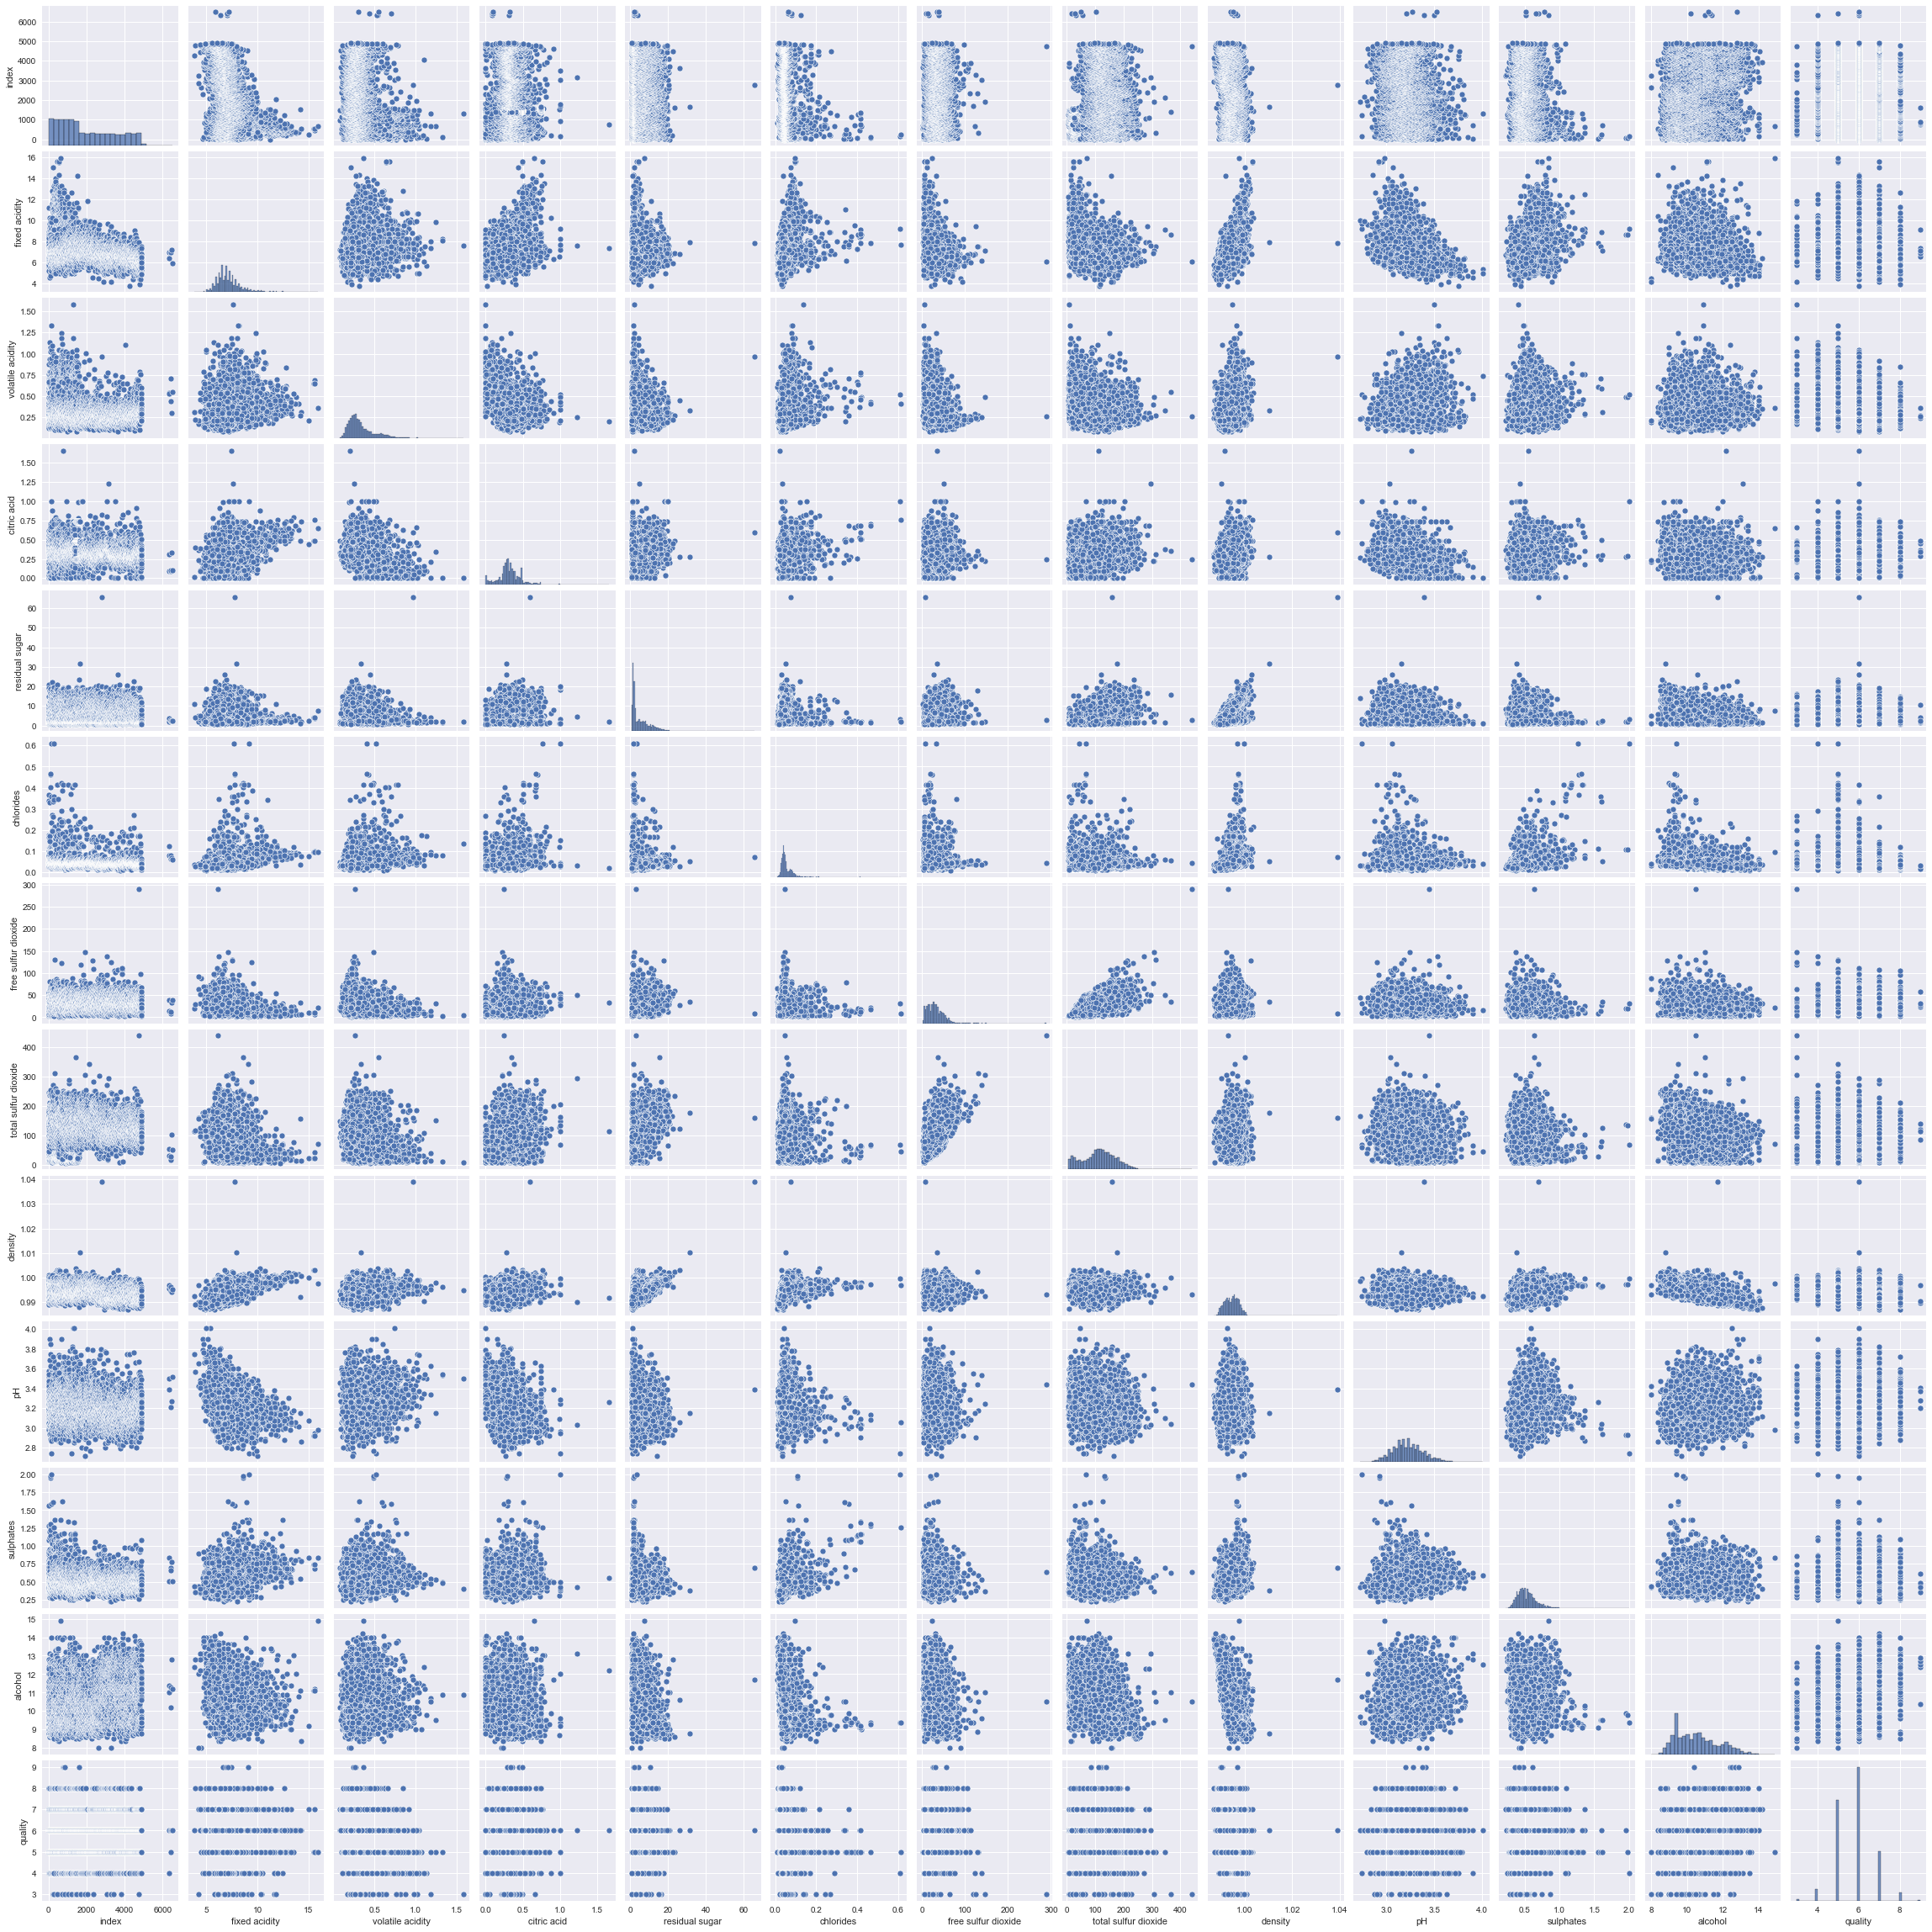

In [71]:
sns.pairplot(df)

<AxesSubplot:xlabel='quality', ylabel='count'>

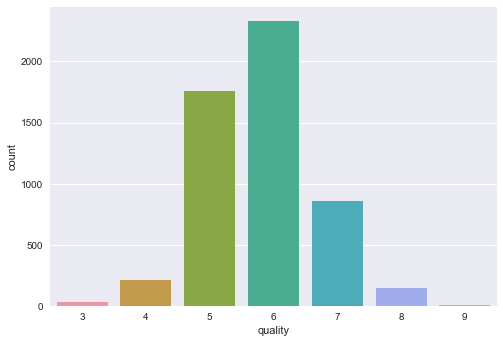

In [66]:
sns.countplot(x = df["quality"])

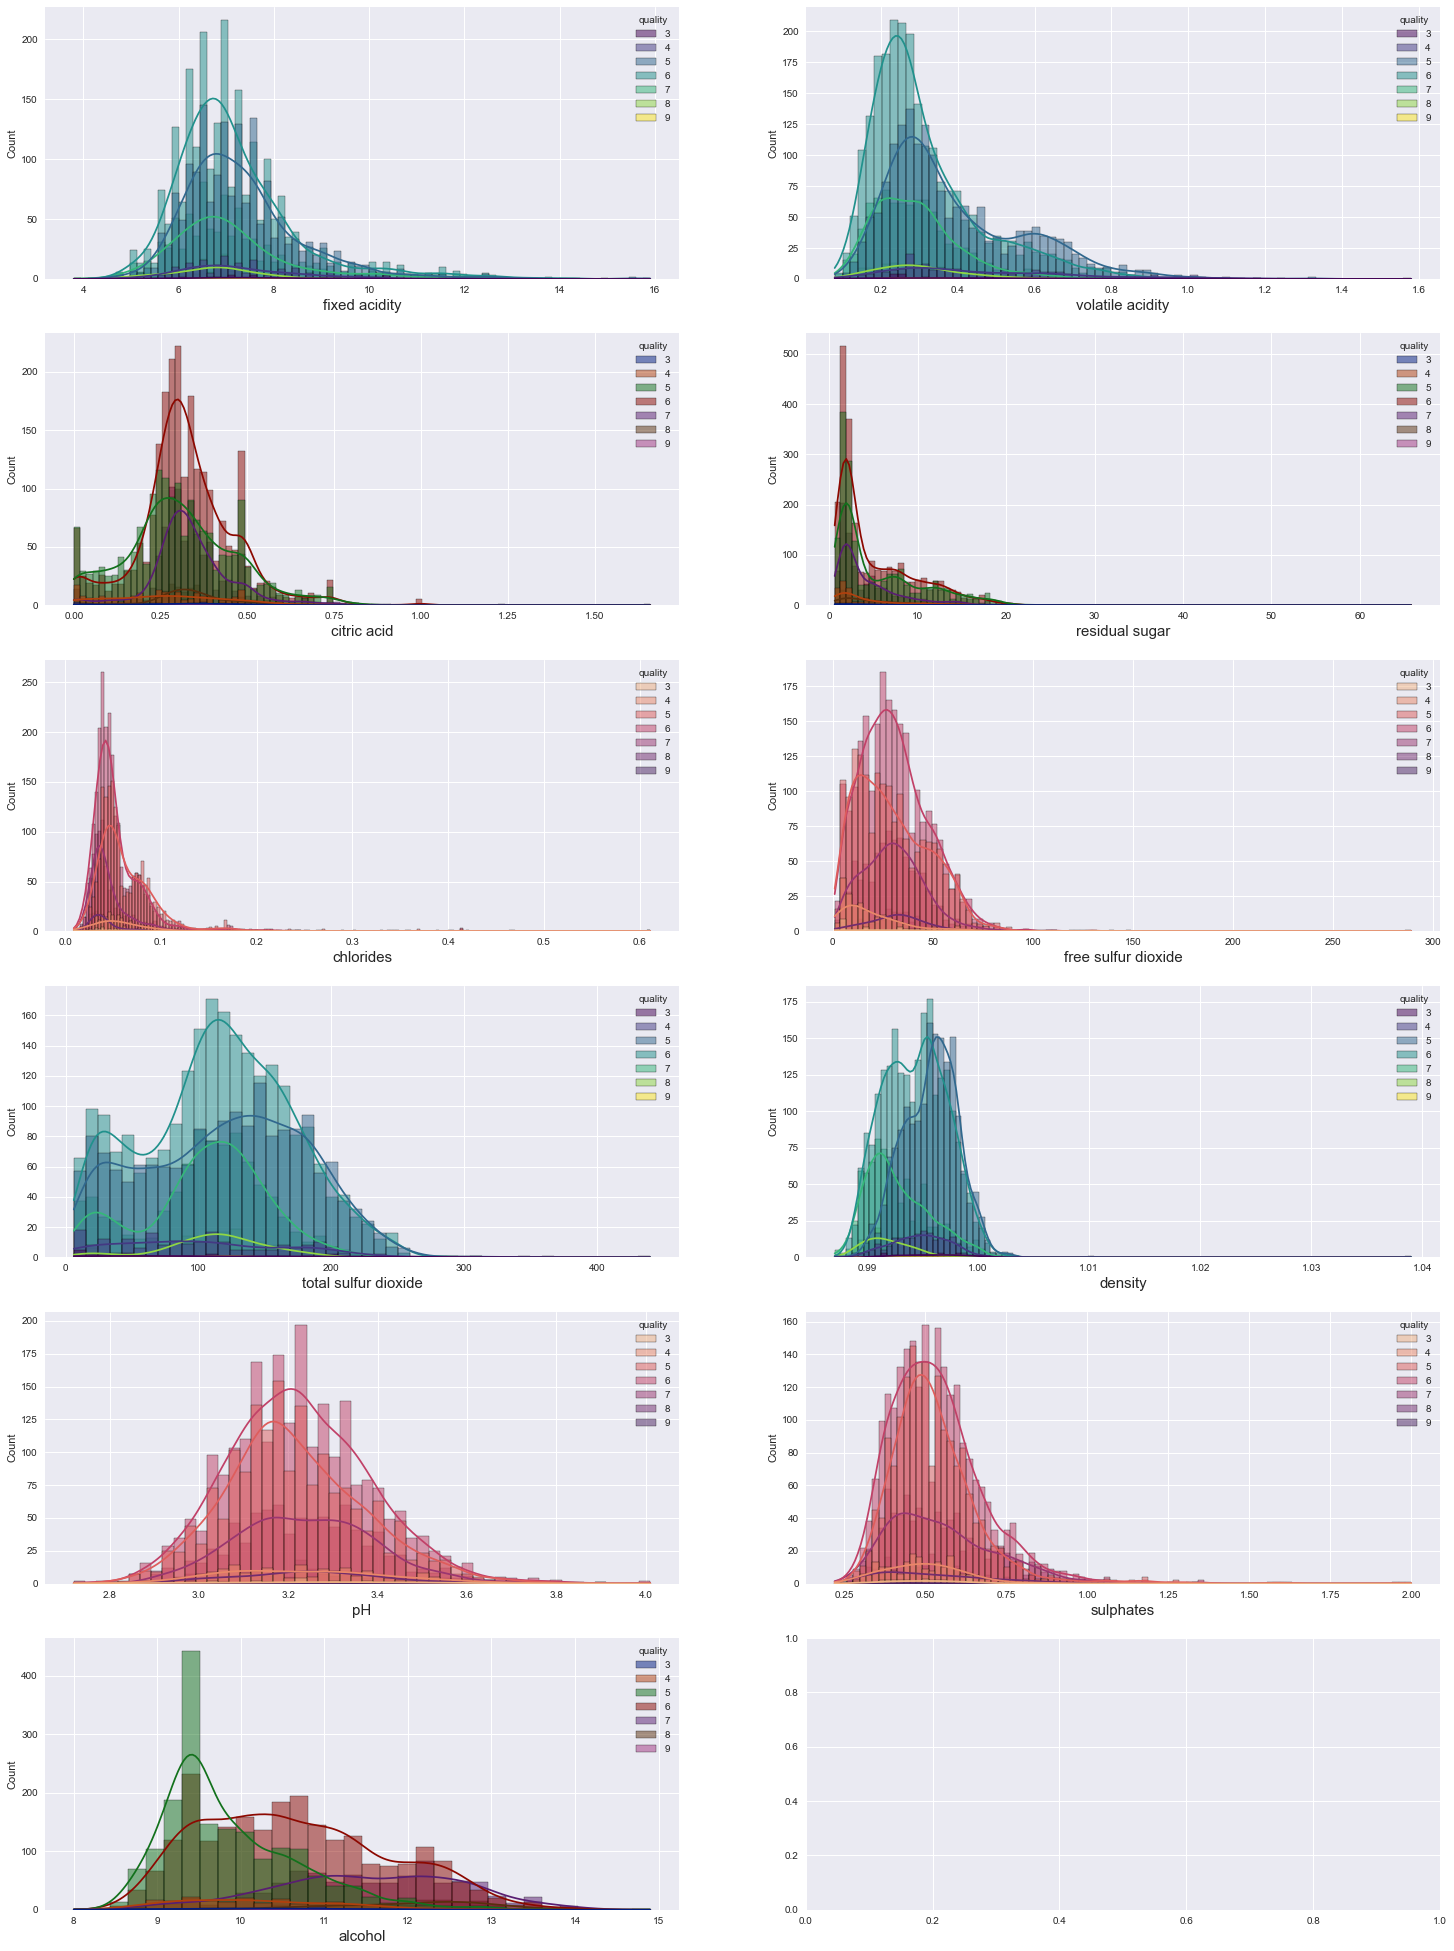

In [70]:
fig, ax =plt.subplots(6,2, figsize=(25,35)) 
plt.style.use("seaborn")


sns.histplot(x = df["fixed acidity"], hue = df["quality"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("fixed acidity",fontsize=15)

sns.histplot(x = df["volatile acidity"], hue = df["quality"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("volatile acidity",fontsize=15)


sns.histplot(x = df["citric acid"], hue = df["quality"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("citric acid",fontsize=15)

sns.histplot(x = df["residual sugar"], hue = df["quality"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("residual sugar",fontsize=15)


sns.histplot(x = df["chlorides"], hue = df["quality"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("chlorides",fontsize=15)

sns.histplot(x = df["free sulfur dioxide"], hue = df["quality"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("free sulfur dioxide",fontsize=15)


sns.histplot(x = df["total sulfur dioxide"], hue = df["quality"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("total sulfur dioxide",fontsize=15)

sns.histplot(x = df["density"], hue = df["quality"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("density",fontsize=15);


sns.histplot(x = df["pH"], hue = df["quality"], palette="flare", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("pH",fontsize=15)

sns.histplot(x = df["sulphates"], hue = df["quality"], palette="flare", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("sulphates",fontsize=15);


sns.histplot(x = df["alcohol"], hue = df["quality"], palette="dark", kde=True, ax=ax[5,0]);
ax[5,0].set_xlabel("alcohol",fontsize=15);

# TRAIN/TEST SPLIT

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop('quality',axis=1)
y = df['quality']

In [77]:
from sklearn.model_selection import train_test_split

training_features, test_features, training_target, test_target \
= train_test_split(X, y, test_size=0.20, random_state=30)

In [78]:
print("Size of training features:", training_features.shape)
print("Size of training target:", training_target.shape)
print("Size of test features:", test_features.shape)
print("Size of test target:", test_target.shape)

Size of training features: (4266, 12)
Size of training target: (4266,)
Size of test features: (1067, 12)
Size of test target: (1067,)


In [79]:
train_unique_label, train_counts_label = np.unique(training_target, return_counts=True)
test_unique_label, test_counts_label = np.unique(test_target, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(training_target))
print(test_counts_label/ len(test_target))

Label Distributions: 

[0.00632911 0.03914674 0.3347398  0.42991092 0.16033755 0.02883263
 0.00070323]
[0.00281162 0.03748828 0.30646673 0.46579194 0.16119963 0.02436739
 0.00187441]


# OVERSAMPLING TO BALANCE DATASET

In [103]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [104]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .10,
                                                  random_state=12)

In [101]:
over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(x_train, y_train)
X_train_res.shape, y_train_res.shape

((11550, 12), (11550,))

Text(0.5, 1.0, 'Distribution of User Churn - Oversampling')

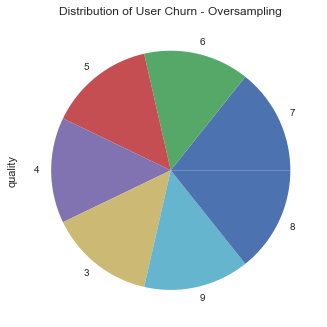

In [124]:
overSampChart = y_train_res.value_counts()
ax = overSampChart.plot(kind='pie')

ax.set_title("Distribution of User Churn - Oversampling")

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(training_features)
X_test1 = scaler.transform(test_features)

In [113]:
X_test1

array([[-0.80938629, -0.09287468,  0.7847838 , ...,  0.08805622,
        -0.03260655, -0.20216083],
       [ 0.38049595, -0.77253355, -0.44727595, ...,  1.1493847 ,
        -0.23420006, -0.4561818 ],
       [ 0.12239904,  0.13367828, -0.91663204, ..., -0.53625465,
        -0.30139789, -1.2182447 ],
       ...,
       [ 1.87357267, -0.24390998, -0.91663204, ..., -1.84730748,
        -0.09980438, -1.2182447 ],
       [-0.96133043,  0.81333716,  1.48881793, ...,  0.52507383,
         0.37058047, -1.13357104],
       [-0.17871401,  0.66230185, -0.27126741, ..., -1.47272095,
        -0.57018924,  0.47522841]])

In [122]:
scaler = MinMaxScaler()

X_train11 = scaler.fit_transform(training_features)

X_test11 = scaler.transform(test_features)

In [123]:
X_test11

array([[0.12704286, 0.27272727, 0.26666667, ..., 0.40310078, 0.1741573 ,
        0.33333333],
       [0.39145853, 0.19834711, 0.12666667, ..., 0.53488372, 0.15730337,
        0.28985507],
       [0.33410422, 0.29752066, 0.07333333, ..., 0.3255814 , 0.15168539,
        0.15942029],
       ...,
       [0.72325008, 0.25619835, 0.07333333, ..., 0.1627907 , 0.16853933,
        0.15942029],
       [0.09327783, 0.37190083, 0.34666667, ..., 0.45736434, 0.20786517,
        0.17391304],
       [0.26719087, 0.3553719 , 0.14666667, ..., 0.20930233, 0.12921348,
        0.44927536]])